In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Parámetros del estudio
prob_facil = 0.15
prob_igual = 0.58  
prob_dificil = 0.27

In [9]:
# Tiempos asumidos (en meses)
tiempo_facil = 3
tiempo_igual = 8
tiempo_dificil = 15

In [41]:
# Semilla para reproducibilidad
np.random.seed(42)

# Rango de simulaciones más simulaciones para mayor suavidad
simulaciones = np.arange(100, 10001, 50)
volatilidades = []

# Calcular volatilidad para cada tamaño de muestra
for n in simulaciones:
    muestra = np.random.choice(
        [tiempo_facil, tiempo_igual, tiempo_dificil],
        size=n,
        p=[prob_facil, prob_igual, prob_dificil]
    )
    log_muestra = np.log(muestra)
    volatilidad = np.std(log_muestra)
    volatilidades.append(volatilidad)



In [42]:
print(f"Tiempo promedio: {media:.2f} meses")
print(f"Volatilidad (σ): {volatilidad:.3f}")

Tiempo promedio: 9.05 meses
Volatilidad (σ): 0.500


In [43]:
# Suavizado con media móvil
def suavizar(lista, ventana=5):
    return np.convolve(lista, np.ones(ventana)/ventana, mode='valid')

volatilidades_suavizadas = suavizar(volatilidades, ventana=10)
simulaciones_suavizadas = simulaciones[:len(volatilidades_suavizadas)]


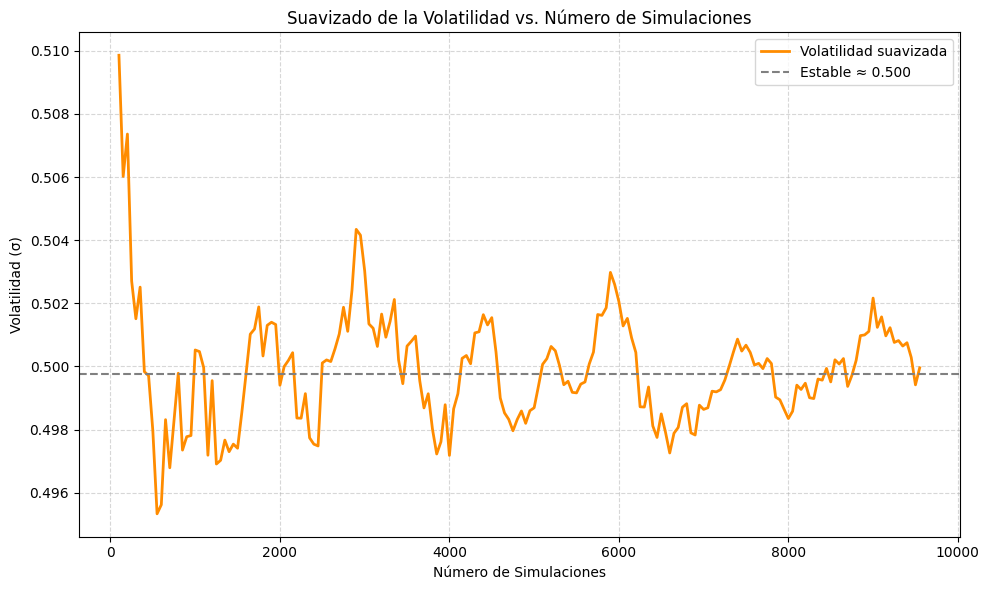

In [44]:
# Visualización
plt.figure(figsize=(10, 6))
plt.plot(simulaciones_suavizadas, volatilidades_suavizadas, color='darkorange', linewidth=2, label='Volatilidad suavizada')
plt.axhline(y=volatilidades[-1], color='gray', linestyle='--', label=f'Estable ≈ {volatilidades[-1]:.3f}')
plt.title('Suavizado de la Volatilidad vs. Número de Simulaciones')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Volatilidad (σ)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
